<a href="https://colab.research.google.com/github/shayonid/code-20220612-shayonidutta/blob/main/LSTM_1sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Using 3D array with LSTM

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


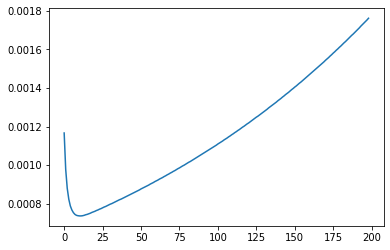

In [8]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('test.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [9]:
# load the dataset
dataframe = pandas.read_csv('test.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

133 66


In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
131/131 - 2s - loss: 0.0509 - 2s/epoch - 17ms/step
Epoch 2/100
131/131 - 0s - loss: 0.0242 - 209ms/epoch - 2ms/step
Epoch 3/100
131/131 - 0s - loss: 0.0196 - 196ms/epoch - 1ms/step
Epoch 4/100
131/131 - 0s - loss: 0.0176 - 210ms/epoch - 2ms/step
Epoch 5/100
131/131 - 0s - loss: 0.0152 - 220ms/epoch - 2ms/step
Epoch 6/100
131/131 - 0s - loss: 0.0130 - 214ms/epoch - 2ms/step
Epoch 7/100
131/131 - 0s - loss: 0.0107 - 214ms/epoch - 2ms/step
Epoch 8/100
131/131 - 0s - loss: 0.0084 - 228ms/epoch - 2ms/step
Epoch 9/100
131/131 - 0s - loss: 0.0064 - 211ms/epoch - 2ms/step
Epoch 10/100
131/131 - 0s - loss: 0.0046 - 218ms/epoch - 2ms/step
Epoch 11/100
131/131 - 0s - loss: 0.0031 - 186ms/epoch - 1ms/step
Epoch 12/100
131/131 - 0s - loss: 0.0020 - 203ms/epoch - 2ms/step
Epoch 13/100
131/131 - 0s - loss: 0.0013 - 207ms/epoch - 2ms/step
Epoch 14/100
131/131 - 0s - loss: 9.1509e-04 - 185ms/epoch - 1ms/step
Epoch 15/100
131/131 - 0s - loss: 6.7929e-04 - 199ms/epoch - 2ms/step
Epoch 16/100


In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


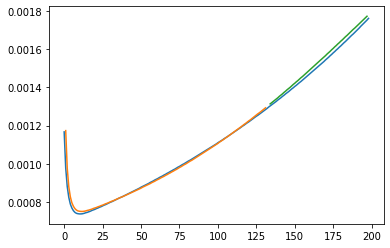

In [17]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()